In [63]:
from pyrootmemo.pullout import Pullout_embedded_elastic, Pullout_embedded_elastic_slipping, Pullout_embedded_elastic_breakage, Pullout_embedded_elastic_breakage_slipping
from pyrootmemo.pullout import Pullout_embedded_elastoplastic, Pullout_embedded_elastoplastic_slipping, Pullout_embedded_elastoplastic_breakage, Pullout_embedded_elastoplastic_breakage_slipping
from pyrootmemo.materials import MultipleRoots
from pyrootmemo.tools.helpers import units
import numpy as np

In [64]:
# generate some root data
from collections import namedtuple
Parameter = namedtuple("parameter", "value unit")
roots = MultipleRoots(
    species = "test_species",
    diameter = Parameter([1, 2, 1, 3, 4, 5, 6, 3], 'mm'),
    yield_strength = Parameter([20, 15, 20, 10, 5, 2.5, 10, 5], 'MPa'),
    tensile_strength = Parameter([40, 30, 40, 20, 10, 5, 20, 10], 'MPa'),
    elastic_modulus = Parameter([100, 100, 100, 100, 100, 100, 20, 100], 'MPa'),
    plastic_modulus = Parameter([50, 50, 50, 50, 50, 50, 10, 50], 'MPa'),
    length = Parameter([1, 1, 1, 1, 1, 1, 1, 1], 'm')
)
# soil data
soil_resistance = 10.0 * units('kPa')
# Weibull shape parameter
weibull_shape = None #25

In [65]:
a = np.array([1,2,3]) * units['m']
[i for i in a]

[<Quantity(1, 'meter')>, <Quantity(2, 'meter')>, <Quantity(3, 'meter')>]

[[0 0 0 0 0 0 0 0]
 [1 1 1 1 2 2 1 2]
 [1 1 1 1 2 2 1 2]
 [1 1 1 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 1 2]]


(<Figure size 432x288 with 1 Axes>, <Axes: >)

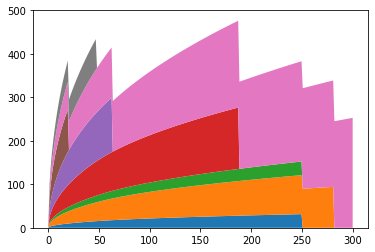

In [66]:
#p = Pullout_base(roots, soil_resistance)
#print(p.roots.xsection)

p0 = Pullout_embedded_elastic(roots, soil_resistance)
p1 = Pullout_embedded_elastic_slipping(roots, soil_resistance)
p2 = Pullout_embedded_elastic_breakage(roots, soil_resistance, weibull_shape = weibull_shape)
p3 = Pullout_embedded_elastic_breakage_slipping(roots, soil_resistance, weibull_shape = weibull_shape)
p4 = Pullout_embedded_elastoplastic(roots, soil_resistance)
p5 = Pullout_embedded_elastoplastic_slipping(roots, soil_resistance)
p6 = Pullout_embedded_elastoplastic_breakage(roots, soil_resistance, weibull_shape = weibull_shape)
p7 = Pullout_embedded_elastoplastic_breakage_slipping(roots, soil_resistance, weibull_shape = weibull_shape)

p = p6
# print(p.behaviour_types)
# print(p.limits)
# print(p.coefficients)
# print(p.force(50 * units('mm')))

disp = np.linspace(0, 300, 20) * units['mm']
f,S,b = p.calculate(disp)
#print(f)
#print(S)
print(b)

p.plot(displacement_max = 300 * units['mm'])